In [1]:
###Author: Sobha B###

#import required libraries#
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
sns.set()#it overwrites the matplotlib functinality

      PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0  3.993780    21.3   25.6       1        1       1
1  8.800000    31.9   25.6       1        2       2
2  0.131694     6.9   15.9       0        3       3
3  2.037500    25.7   32.0       1        4       2
4  1.487500    25.7   32.0       1        4       2


C:\Users\19402\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


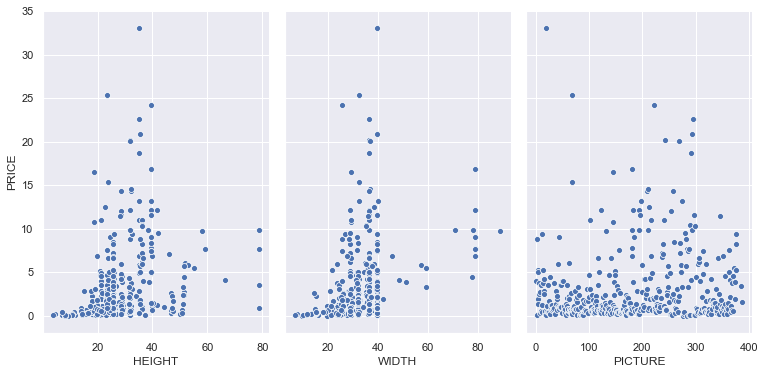

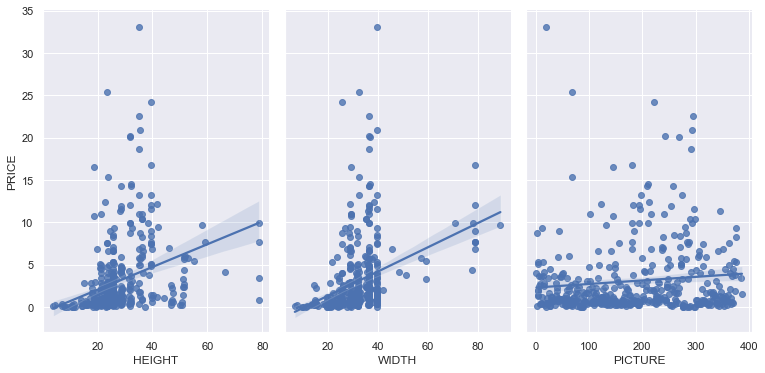

In [2]:
#import csv file#
data=pd.read_csv('monet.csv')
X1=DataFrame(data,columns=['HEIGHT'])
X2=DataFrame(data,columns=['WIDTH'])
X3=DataFrame(data,columns=['SIGNED'])
X4=DataFrame(data,columns=['PICTURE'])
X5=DataFrame(data,columns=['HOUSE'])

a=data['HEIGHT']
b=data.WIDTH

X=data.HEIGHT*data.WIDTH
X6=np.log(X)
#X=np.log(X)
y=DataFrame(data,columns=['PRICE'])
#y=np.log(data['PRICE'])
print(data.head(5))
sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7)
sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7,kind='reg')

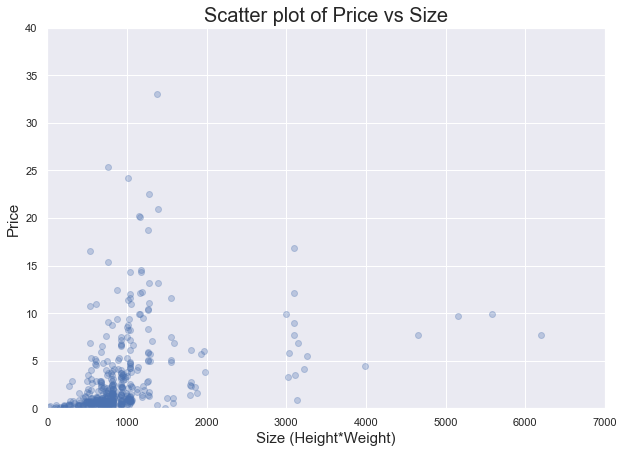

In [3]:
#plt.scatter(X,y)
plt.figure(figsize=(10,7))
plt.scatter(X,y,alpha=0.3)
plt.title('Scatter plot of Price vs Size',fontsize=20)
plt.xlabel('Size (Height*Weight)',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.ylim(0,40)
plt.xlim(0,7000)
plt.show()

In [4]:
#create linear regression model object
lreg = LinearRegression()

X=np.array(X).reshape(-1, 1) 
lreg.fit(X,y)
print('Size(X) Coefficient: ',lreg.coef_)
print('Intercept: ',lreg.intercept_)


Size(X) Coefficient:  [[0.00221271]]
Intercept:  [1.0082498]


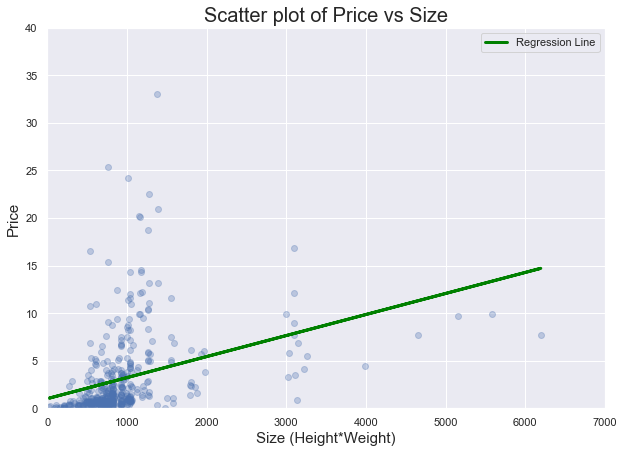

In [5]:
#plt.scatter(X,y)
plt.figure(figsize=(10,7))
plt.scatter(X,y,alpha=0.3)
plt.plot(X, lreg.predict(X),lw=3, color='green',label='Regression Line')#lw-line width
#or
yhat=1.0082498+X*0.00221271
#plt.plot(X, yhat,lw=3, color='orange',label='Regression Line')#lw-line width
plt.legend()
plt.title('Scatter plot of Price vs Size',fontsize=20)
plt.xlabel('Size (Height*Weight)',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.ylim(0,40)
plt.xlim(0,7000)
plt.show()

In [6]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#create and fit the model
lreg = LinearRegression()
lreg.fit(X_train,y_train)

#find the coefficients
print('Size(X) Coefficient: ',lreg.coef_)
print('Intercept: ',lreg.intercept_)


Size(X) Coefficient:  [[0.00211231]]
Intercept:  [1.02522925]


In [7]:
#test r2 score
print('R^2 Score for Linear Regression:', lreg.score(X_test,y_test))
print('R^2 Score for Linear Regression:', r2_score(y_test,lreg.predict(X_test)))

#test the predictions
pred=lreg.predict([[4000]])
print('Prediction of Price for Size 4000:', pred)
pred=lreg.predict(X_test)
print('Prediction of Price for X_test values:', pred)


R^2 Score for Linear Regression: 0.10768817563933397
R^2 Score for Linear Regression: 0.10768817563933397
Prediction of Price for Size 4000: [[9.47447822]]
Prediction of Price for X_test values: [[ 2.07135189]
 [ 2.6154624 ]
 [ 3.21979493]
 [ 3.16660691]
 [ 2.77718103]
 [ 3.21979493]
 [ 2.32863152]
 [ 2.76239484]
 [ 3.17725296]
 [ 2.18697986]
 [ 2.04336375]
 [ 3.97139788]
 [ 2.75022792]
 [ 3.15579187]
 [ 2.2922575 ]
 [ 2.46806525]
 [ 3.46448518]
 [ 7.66676141]
 [ 3.15579187]
 [ 2.33450375]
 [ 3.21979493]
 [ 2.98049108]
 [ 2.49582103]
 [ 2.1891133 ]
 [ 2.34075619]
 [ 2.77718103]
 [ 2.18602932]
 [ 2.45594058]
 [ 2.70198271]
 [ 2.98815877]
 [ 2.42448825]
 [ 1.08042397]
 [ 2.98275125]
 [ 3.00125511]
 [ 2.47588081]
 [ 4.81049279]
 [ 2.09051056]
 [ 2.14623336]
 [ 2.82515164]
 [ 2.70198271]
 [ 1.64403112]
 [ 2.98934167]
 [ 2.68128205]
 [ 2.75022792]
 [ 4.3890865 ]
 [ 2.47702146]
 [ 3.22585727]
 [ 1.4842347 ]
 [ 2.98934167]
 [ 3.15285576]
 [ 3.73912802]
 [ 3.69519193]
 [ 3.18333642]
 [ 2.89462

In [8]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores=cross_val_score(lreg, X_train, y_train, cv=10)
print(scores.mean())

0.10701318017424641


In [9]:
#loss functions
print('MSE for Linear Regression:', mse(y_test,pred))
print('RMSE for Linear Regression:', np.sqrt(mse(y_test,pred)))
print('MAE for Linear Regression:', mae(y_test,pred))

MSE for Linear Regression: 21.80355191681516
RMSE for Linear Regression: 4.669427364979046
MAE for Linear Regression: 2.673432826951079
